In [1]:
import ujson as json
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
with open("asr_ranks.json", "r") as f:
    ranks_asr = json.load(f)

with open("caption_ranks.json", "r") as f:
    ranks_caption = json.load(f)

with open("image_ranks.json", "r") as f:
    ranks_image = json.load(f)

with open("cosmir_ranks.json", "r") as f:
    ranks_cosmir = json.load(f)

20


In [12]:
from data import queries

In [50]:
def format_for_df(ranks, i, method):
    rank = min([ranks[i].index(q) for q in queries[i].correct_segments])+1
    datapoint = {
        "rank": rank,
        "mrr": 1.0/rank,
        "method": method,
        "query": i,
        "class": queries[i].classification
    }
    return datapoint

mrr = []
for i in range(len(queries)):
    mrr.append(format_for_df(ranks_asr, i, "ASR Transcript"))
    mrr.append(format_for_df(ranks_caption, i, "Caption Embedding"))
    mrr.append(format_for_df(ranks_image, i, "Image Embedding"))
    mrr.append(format_for_df(ranks_cosmir, i, "Cosmir"))

mrr_df = pd.DataFrame(mrr)

In [ ]:
cat = sns.catplot(data=mrr_df, x="method", y="mrr", aspect=11/8)

In [39]:
cutoffs = [1,2,5,10,25,50,100,200]

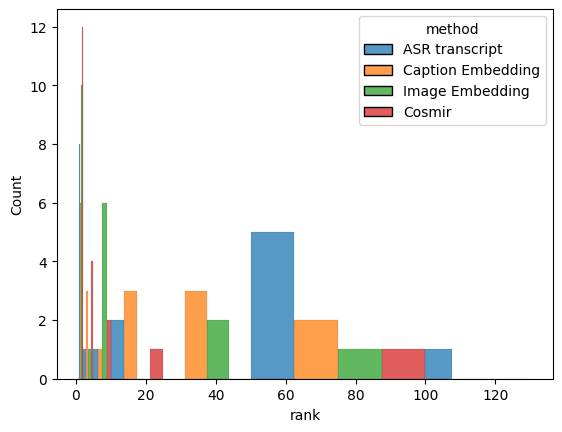

In [17]:
hist = sns.histplot(data=mrr_df, x="rank", hue="method", multiple="dodge", bins=cutoffs)

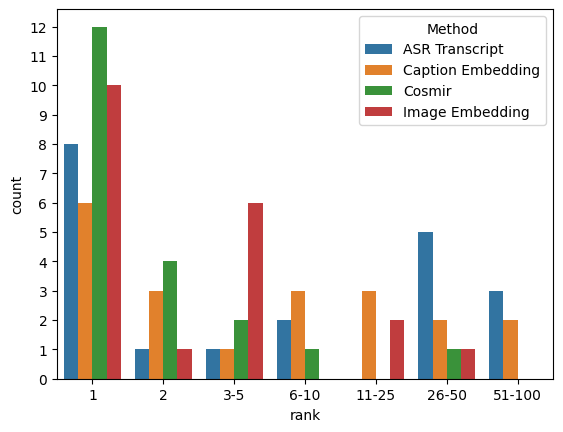

In [51]:
# Create a DataFrame with bins and counts for each method
hist_data = []
for method_group in mrr_df.groupby("method"):
    method_name, method_group = method_group
    counts, _ = np.histogram(method_group["rank"], bins=cutoffs)
    hist_data.extend({"method": method_name, "rank": bin, "count": count} for bin, count in zip(cutoffs, counts))

hist_df = pd.DataFrame(hist_data)

# Plotting side-by-side bars with the same width
sns.barplot(data=hist_df, x="rank", y="count", hue="method", dodge=True)

xticklabels = ["1", "2", "3-5", "6-10", "11-25", "26-50", "51-100"]
plt.xticks(range(len(xticklabels)), xticklabels)
plt.yticks(range(13))

# Add legend
plt.legend(title="Method")

# Show the plot
plt.show()

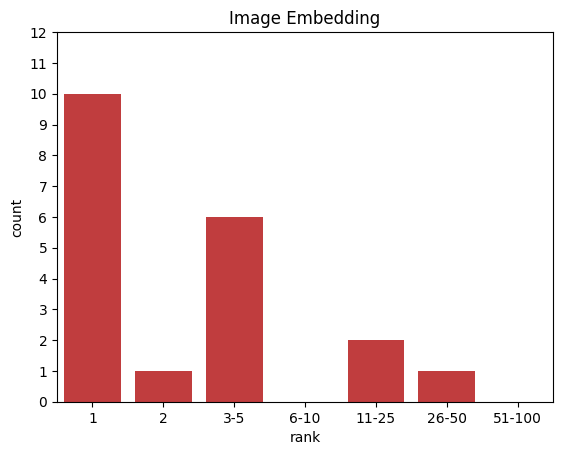

In [57]:
meth = "Image Embedding"
# Create a DataFrame with bins and counts for each method
hist_data = []
for method_group in mrr_df.groupby("method"):
    method_name, method_group = method_group
    counts, _ = np.histogram(method_group["rank"], bins=cutoffs)
    hist_data.extend({"method": method_name, "rank": bin, "count": count} for bin, count in zip(cutoffs, counts))

hist_df = pd.DataFrame(hist_data)

# Plotting side-by-side bars with the same width
sns.barplot(data=hist_df[hist_df["method"]==meth], x="rank", y="count", dodge=True, color="tab:red")

xticklabels = ["1", "2", "3-5", "6-10", "11-25", "26-50", "51-100"]
plt.xticks(range(len(xticklabels)), xticklabels)

plt.yticks(range(13))

# Add legend
plt.title(meth)

# Show the plot
plt.show()